<a href="https://colab.research.google.com/github/camilo28-Universidad/Proyecto-Inteligencia-Artificial/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Inteligencia Artificial

###Camilo Andres Barbosa Molina

[GitHub](https://github.com/camilo28-Universidad/Proyecto-Inteligencia-Artificial/) Invitacón Enviada 

Dataset escogido: [Dataset](https://www.kaggle.com/neuromusic/avocado-prices)


#Primera Entrega

##Contexto
Es un hecho bien conocido que los Millenials AMAN las tostadas de aguacate. También es un hecho bien conocido que todos los Millenials viven en los sótanos de sus padres.

**¡Claramente, no están comprando una casa porque están comprando demasiadas tostadas de aguacate!**

Pero tal vez haya esperanza ... si un Millenial pudiera encontrar una ciudad con aguacates baratos, podría vivir el Sueño Americano del Milenio.

Tomado de : [Website](https://www.kaggle.com/neuromusic/avocado-prices)

##Contenido
La siguiente tabla representa los datos de escaneo de minoristas semanales de 2018 para el volumen minorista nacional (unidades) y el precio. Los datos de escaneo minorista provienen directamente de las cajas registradoras de los minoristas en función de las ventas minoristas reales de aguacates Hass. A partir de 2013, la siguiente tabla refleja un conjunto ampliado de datos minoristas de múltiples puntos de venta. Los informes de múltiples puntos de venta incluyen una agregación de los siguientes canales: abarrotes, misa, clubes, drogas, dólares y militares. El precio promedio (de aguacates) en la tabla refleja un costo por unidad (por aguacate), incluso cuando se venden varias unidades (aguacates) en bolsas. Los códigos de búsqueda de productos (PLU) de la tabla son solo para aguacates Hass. Otras variedades de aguacates (por ejemplo, pieles verdes) no se incluyen en esta tabla.


Tomado de : [Website](https://www.kaggle.com/neuromusic/avocado-prices)

## Importar


In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm


## Importar Dataset

¡Si no abre el NoteBook con el archivo .csv recuerda visitar el GitHub para obtenerlo, este se debe guardar en la carpeta sample_date!

In [95]:
#Importar Dataser con pd.read_csv
aguacates_data = pd.read_csv('sample_data/avocado.csv',index_col=0)



In [96]:
#Visualizar la data
aguacates_data

,Date,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [98]:
#Visualizar primeras  cinco filas de la data
aguacates_data.head()


,Date,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##Información de columnas
* Date: la fecha de la observación
* AveragePrice: el precio medio de un solo aguacate
* type: forma de cultivo, convencional u orgánico
* year: el año
* region: la ciudad o región de la observación
* TotalVolume: número total de aguacates vendidos
* 4046: Número total de aguacates con PLU 4046 vendidos
* 4225: Número total de aguacates con PLU 4225 vendidos
* 4770: Número total de aguacates con PLU 4770 vendidos

## Análisis de datos

In [67]:
#Averiguar la cantidad de datos de Dataframe
aguacates_data.shape

(18249, 13)

In [68]:
#Recordar comandos como loc y iloc para trabar con columnas y filas especificas
#de una DataFrame

aguacates_data.loc[:,['AveragePrice']]


,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
7,1.63
8,1.71
9,1.87
10,1.93


In [69]:
#Otros ejemplos
aguacates_data.loc[aguacates_data.type.isin(['conventional'])]

,Date,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,0.76,1272039.80,531469.08,368948.26,13078.20,358544.26,127833.03,229786.03,925.20,conventional,2018,WestTexNewMexico
8,2018-01-28,0.85,957086.16,479147.93,179489.19,7314.98,291134.06,143430.96,147376.43,326.67,conventional,2018,WestTexNewMexico
9,2018-01-21,0.84,1020913.20,505263.29,177911.40,9468.95,328269.56,118978.50,209131.06,160.00,conventional,2018,WestTexNewMexico
10,2018-01-14,0.90,950954.60,463945.73,188126.02,11227.47,287655.38,125408.69,162040.02,206.67,conventional,2018,WestTexNewMexico


In [70]:
#Revisar si existen valores nulos
#De manera Global
#aguacates_data.isnull()

#Realizar valores que existen dentro de una columna especifica
# agucates_data.Date.isnull().unique()
# agucates_data.AveragePrice.isnull().unique()
# agucates_data.TotalVolume.isnull().unique()
# agucates_data.PLU4046.isnull().unique()
# agucates_data.PLU4225.isnull().unique()
# agucates_data.PLU4770.isnull().unique()
# agucates_data.TotalBags.isnull().unique()
# agucates_data.SmallBags.isnull().unique()
# agucates_data.LargeBags.isnull().unique()
# agucates_data.XLargeBags.isnull().unique()
# agucates_data.type.isnull().unique()
# agucates_data.year.isnull().unique()
# agucates_data.region.isnull().unique()


#O de forma mas profunda

aguacates_data.loc[aguacates_data.region.isnull()]



,Date,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region


In [83]:
#Es importante reconocer vales unicos en columnas como type, year y region
aguacates_data.type.unique()
#aguacates_data.year.unique()
#aguacates_data.region.unique()

array(['conventional', 'organic'], dtype=object)

In [72]:
#Funciones como .describe permiten ver las operaciones como mean,count,std,min,max
#Para colummans como AveragePrice, TotalVolume y cada PLU
#aguacates_data.PLU4046.describe()
#aguacates_data.PLU4225.describe()
#aguacates_data.PLU4770.describe()
#aguacates_data.TotalVolume.describe()
aguacates_data.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [93]:
#la funcion groupby para realizar operaciones de acuerdo a una dos columnas
#aguacates_data.groupby(['Date']).AveragePrice.agg([len, min, max])
aguacates_data.groupby(['region']).AveragePrice.agg([ min, max])

,min,max
region,,
Albany,0.85,2.13
Atlanta,0.62,2.75
BaltimoreWashington,0.95,2.28
Boise,0.58,2.79
Boston,0.85,2.19
BuffaloRochester,1.03,2.57
California,0.67,2.58
Charlotte,0.80,2.83
Chicago,0.70,2.30


In [92]:
#Revisar el tipo de datos de todas las columnas y si es necesario cambiarla de tipo
aguacates_data.dtypes
#Como convertir la columna date a  tipo fecha
aguacates_data.Date = pd.to_datetime(aguacates_data['Date'])
#Agregar columna Status para poder identificar con un numero las dos formas que se usan para cultivar este producto 
aguacates_data['Status'] = np.where(aguacates_data.type=="conventional", '1', '2')
#Convertir dicha columna en un entero para poder crear el digrama de correlación
aguacates_data['Status']=aguacates_data['Status'].astype('int64')
aguacates_data.dtypes

Date            datetime64[ns]
AveragePrice           float64
TotalVolume            float64
PLU4046                float64
PLU4225                float64
PLU4770                float64
TotalBags              float64
SmallBags              float64
LargeBags              float64
XLargeBags             float64
type                    object
year                     int64
region                  object
Status                   int64
dtype: object

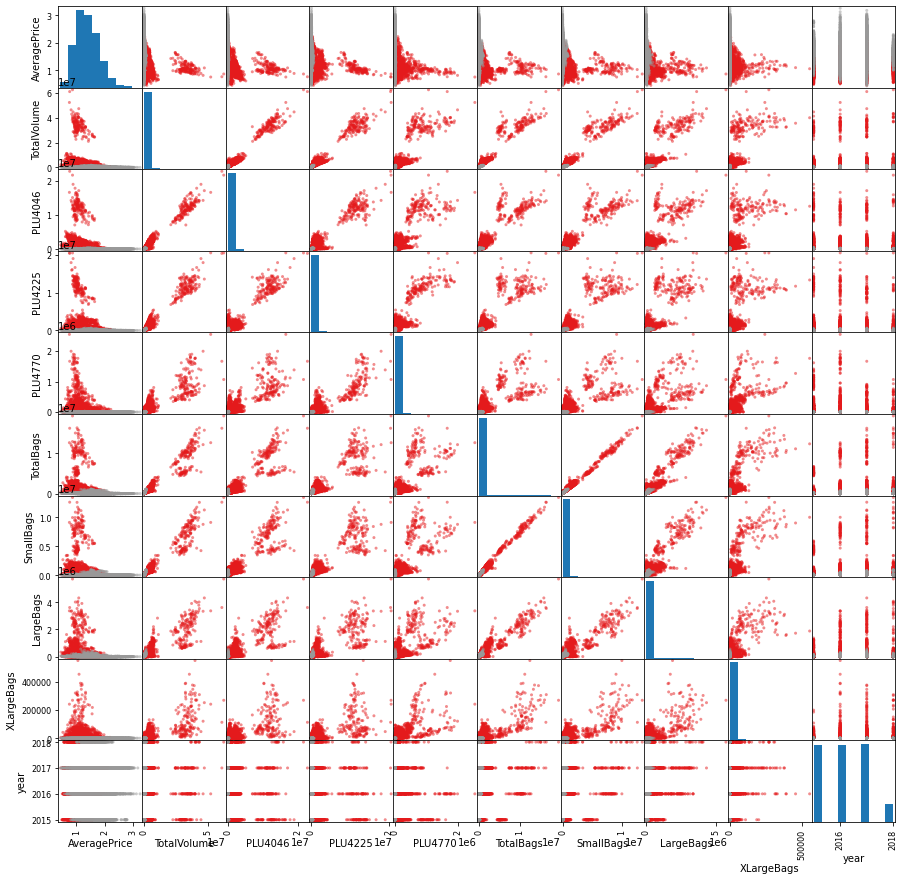

In [75]:

#Crear gráficos que permitan visualizar la correlación de características
cmap = cm.get_cmap('Set1') 
dif_class=np.asarray(aguacates_data.Status)
aguacates_data=aguacates_data.drop(columns=["Status"])
pd.plotting.scatter_matrix(aguacates_data, c=dif_class, cmap=cmap, figsize=(15, 15));